# MCIS6273 Data Mining (Prof. Maull) / Fall 2021 / HW2b

**This assignment is worth up to 15 POINTS to your grade total if you complete it on time.**

| Points <br/>Possible | Due Date | Time Commitment <br/>(estimated) |
|:---------------:|:--------:|:---------------:|
| 15 | Sunday, November 7 @ Midnight | _up to_ 20 hours |


* **GRADING:** Grading will be aligned with the completeness of the objectives.

* **INDEPENDENT WORK:** Copying, cheating, plagiarism  and academic dishonesty _are not tolerated_ by University or course policy.  Please see the syllabus for the full departmental and University statement on the academic code of honor.

## OBJECTIVES
* Continue practicing exploratory data analysis and visualization

* Perform a clustering analysis using k-means

## WHAT TO TURN IN
You are being encouraged to turn the assignment in using the provided
Jupyter Notebook.  To do so, make a directory in your Lab environment called
`homework/hw2b`.   Put all of your files in that directory. 

Then zip that directory,
rename it with your name as the first part of the filename (e.g. `maull_hw2b_files.tar.gz`), then
download it to your local machine, then upload the `.tar.gz` to Blackboard.

If you do not know how to do this, please ask, or visit one of the many tutorials out there
on the basics of using in Linux.

If you choose not to use the provided notebook, you will still need to turn in a
`.ipynb` Jupyter Notebook and corresponding files according to the instructions in
this homework.


## ASSIGNMENT TASKS
### (25%) Continue practicing exploratory data analysis and visualization 

In the last HW we explore some of the basic features of Pandas with graphic and data selection. This time we're going to go a but deeper into Pandas ans learn about MultIndices and grouping data in interesting and useful ways.

Power weightlifting (powerlifting) is an international sport that invites advanced amateurs and professionals alike. Fortunately, there are datasets for the multitude of powerlifting competitions around the world, and they are openly available for curious data scientists like ourselves who would like to ask interesting questions and find interesting relationships in the data. Whether you're into the sport or not, I think there are a variety of interesting phenomenon in the data that make it both tractable and interesting from just a data perspective.

**DATA**

[OpenPowerLifting.org](https://openpowerlifting.org) is a large set of data for a multitude of data related to powerlifting competitions around the world. The core data live at the following open source repository on [gitlab.com/openpowerlifting/opl-data](https://gitlab.com/openpowerlifting/opl-data).

One of the things that we will learn from the data is that the majority of it are
interesting over several dimensions.  There are the years of competition, the sex of the competitors,
the age the competitors, country of origin, among other things.  With denser data like these, we want
to understand some of the underlying groupings for easier access to the data.  For example,
one might want to understand how groupings by year and age bear out on the data to explore questions
like "Has the number of competitors over 40 increased over the years?"  This might be an interesting
question to ask to explore if powerlifters continue to compete as they age since the sport is very
difficult on one's body and requires intense continuous training to stay competitive.

Some questions like these are also very useful to explore visually, so we'll dive into a few more
graphical techniques to get at these answers and more.  We're going to end up with a DataFrame
that will group our data by year, age class and sex, so we can see some of the interesting
annual trends along each of these dimensions within the last two decades.

&#167;  **BUILD THE DATASET**

We've learned CSV is common file format for data and we will be working the files large text files in Gitlab to do the work we need. The task is to explore the repository and build up a dataset of 15 random lifting meets from 2019 using BeautifulSoup and the tools in Pandas to put these datasets together.

Oridinarily, we would use a technique often known as "crawling" and is consider by some to be a flagrant violation of good web etiquette. However, the technique is still often the only way to obtain data en masse from a single source. If this were an FTP server, the same pattern could be applied and would not be considered unusual to do so. Of course, you must use this with caution, as it can result in IP throttling and IP blocking, so please use it within the licensing terms of both the data and website you are obtaining data from. Good web citizens restore trust in providers and administrators alike, so throttling yourself after your own requests with code like time.sleep(2) (which will pause your code for 2 seconds), will show that you can behave responsibly.

Because we have to employ specific techniques when crawling
datasets from dynamic web pages made with Javascript, and we're in a good position
to just get the data we need from the ZIP file in the repository,
we'll just assume we have already downloaded it and
use the data provided in the `data/` folder which is just a
random subset of 40 folders from the repository.

You will take the random data and build yet another dataset
of just the data from 2019.  See the supplemental notebook
to see how to do this, but the easiest is to use the
[Python `glob` module](https://docs.python.org/3/library/glob.html).

**Load all the 2019 datasets into a single Pandas DataFrame**.

Your DataFrame should have around 21K rows.


&#167;  **FILTER AND EXPLORE THE DATA**

Let's first get a feel for the data and filter it down.  One of the main
difficulties in dealing with large user-contributed data sets like these
are _data consistency_ and _data quality_.  _Data consistency_ refers to
how data is represented over time.  We can see how this becomes an issue
when we look at the `Division` column of the dataset.  We can see with a
relatively untrained eye to the data, that something is very wrong with
the consistency &mdash; there are nearly 400 Division designations!  

When look at it more closely, there are groupings that overlap.  For
example, you will see `Masters 45-49` and `Masters 40-49` when you
perform a `.value_counts()` on the `Divisions` column of the data (see
supplemental notebook).  What is the difference between these two since
they obviously overlap?  Coming from the outside, we might not easily answer
that question.

We'll perform a few exploratory exercises to get a feel for the data.

Answer the following questions in your notebook:

1. What are the densities (counts) of participants in the top 5 `Division`s?
1. How many `M` and `F` sex values are in the dataset?
1. After dropping `NaN` values, what are the top 5 countries in the data, by number of datapoints?
1. For the country of _Belarus_, how many participants are there in this data?
1. Out all the data, how much of it is missing all of `Age`, `BirthYear` and `BirthDate`?  Give both the raw number and the percentage.


&#167;  **CLEAN THE DATA**

From the previous section, you learned that a good percentage of the data is lacking age
information.  You also learned that between `Age`, `BirthDate`, and `BirthYear`, there
are quite a few gaps, but that the age coverage could be increased if we took the time
to do so. 

We are going to fill in those gaps the easy way -- by making sure that `Age` has the data
it needs as we are going to do analysis over that in the subsequent parts of the 
assignment (and it is one of the fields we can actually do something about).

In this part, you will write a function and use the `apply()` method in Pandas
to fill in the missing data.

You will need to:

* find all data missing `Age`, but has at least `BirthYear` and `BirthDate`.
* calculate age by either subtracting `BirthYear` from 2019 **or** by subtracting the 
  year part from `BirthDate`.
* in your final DataFrame, make sure Age is an `int` type.
* show all the steps in your notebook to get full credit.

After doing that answer the following questions:

1. How many new datapoints did you add to the dataset after filling in the missing Age values?


&#167;  **GROUP THE DATA**

Pandas provides superior capabilities to slice and group data.  We would like
to build answer some questions of the 2019 data.

You will need to study the following resources to complete the questions in this section:

*  [`Dataframe.query()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html#pandas.DataFrame.query)
*  [`DataFrame.groupby()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html#pandas.DataFrame.groupby).  A useful hint when using this function is that you can pass to the first parameter of `DataFrame.groupby()` the list of the grouping in order of grouping, outer group first.  Thus, `groupby(['Sex', 'Division`]) will return the MultiIndex DataFrame with `Sex` as the outermost group
and `Division` the inner group. 

**NOTE**: you will use the filtered data from the previous section -- you do not want to include the missing
`Age` data in your analysis

Answer the following question for full credit on this part:

1. How many `M` sex participants are there in the `Open Pro` Division?
1. What is the median age of all participants in the `Open` Division?
1. What is the mean `BodyweightKg` in the `Open` Division men (`M`)?  
1. How does this compare with `Open` Division women (`F`)?
1. What is the correlation coefficient (Pearsons $r$ is fine) between `Best3BenchKg`?  Would you consider
   this to be a positive, negative or no correlation?


&#167;  **VISUALIZE**

Now that we have the data segmented the way we'd like, let's visualize it
in some interesting way.

With powerlifting there are a number of ways to express the _strength_ of a
competitor. There is _raw_ strength, meaning how much total weight was lifted
on a given lift, and there is _relative_ strength.  It is not fair to compare
the raw lift of a 100lb 16 year old teenage to that of a 35 year old 300lb adult.

The 35 year old might lift ten times the weight yet the 16 year old may be _relatively_
stronger, but how would we compare their
_relative_ strengths?  Many competitors will be able to lift between 2 and 7 times
their body weight depending on the lift, so we might expect a 100lb powerlifter
to perhaps perform a 200lb bench press and maybe a 300lb squat, both impressive
for their weight.  To deal with comparing _strength_ across age and weight variables
a number of methods have been developed to create fair and accurate measures of
_relative strength_.  The OpenPowelifting dataset includes three such measures:
_Wilks_, _McCulloch_ and _Glossbrenner_, which give a numeric assignment of relative
strength which factor age and weight into the computation.  Exploring the details
of each of these methods is beyond the scope of this homework, but the curious can
learn more on the variety of sites which calculate these statistics.

We will restrict our interest to the _Glossbrenner_ score, which takes into account
age and weight to compute a normalized weight value.  Consider three competitors,
all 29 year olds, with one male and one female weighing 131.84lbs and the last male
weighing 263.67 pounds.  Assume they all lift 639.33 pounds total.  The _Glossbrenner_ score
takes into account the age and weights and produces a relative score with the
following:

| competitor | sex | age (lbs) | weight (lbs) | lift (lbs) | score | $\gamma$-coefficient | $\gamma_{age}$-coefficient
|-----------:|:---:|:---:|:------:|:-----:|:-----:|:--------------------:|:----:|
| 1 | F | 29 | 100 | 639.33 | 457.28 | 0.7152 | 1.0 |
| 2 | M | 29 | 100 | 639.33 | 373.94 | 0.5849 | 1.0 |
| 3 | M | 29 | 100 | 639.33 | 373.94 | 0.5849 | 1.0 |
| 4 | M | 49 | 100 | 639.33 | 416.20 | 0.5849 | 1.113 |
| 5 | F | 49 | 100 | 639.33 | 508.95 | 0.7152 | 1.113 |


The _Glossbrenner_ score is in the _score_ column and the $\gamma$-coefficient is
the constant calculated by the method.  The $\gamma_{age}$-coefficient is a constant which the 
method factors in for the relative impact age has on the
competitor.  Thus, the _Glossbrenner_ score $\Gamma$ is:

$$
\Gamma(age, sex, weight) = \gamma{\text{-coefficient}}_{weight,sex} \times \gamma_{age} \times weight
$$

You will need to use the code in the OpenPoweLifting repository to complete the calculation.

You can download the [`coefficient.py`](https://gitlab.com/openpowerlifting/opl-data/-/raw/main/scripts/coefficient.py\?inline\=false) file to the directory where your notebook lives.  Then you can simply
`import coefficient` and use it like in this example:

```python

import coefficient

for i, d in enumerate(data):
    if d[0]:
        g_coeff = coefficient.glossCoeffMen(d[2])  
    else:
        g_coeff = coefficient.glossCoeffWomen(d[2])
        
    gb_score = \
        g_coeff  *\
        coefficient.AGE_COEFFICIENTS[d[1]] *\
        d[3]
```

Now that we have that out of the way, let's visualize some data.  Specifically, we'd like to
plot the _Glossbrenner_ score for the last 20 years over time.  Are the scores going up, down
or staying the same?  One could expect any of these scenarios to occur, so let's dive in.

What we want to produce are two _area_ plots of the annual _mean Glossbrenner_ score
from 1999 to 2018 for all age groups, one plot for males and the other for females as putting them all on
one graph would most certainly be information overload.  To do this we will need to
slice the data in a way that makes a multi-index grouped by year, age group and sex.

You will  the data in `data/1999_to_2018` to do this and make a visual of it.

Your area plot code will be invoked by:

```python

DataFrame.plot.area()

```

You may optionally pass in the `figsize=(15,7)` (or whatever dimensions you'd like)
to stretch the data out a bit so you can visually see what is going on, since the
legend may get in the way of viewing the data.

Your plot will look something like this:

![](./sample_area.png)

Please see the [`DataFrame.plot.area()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.area.html#pandas.DataFrame.plot.area) method for full information on
the area plots.

**A final important note**: You will need to use [`droplevel()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.droplevel.html) and
[`unstack()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.unstack.html)
in order to prepare your DataFrame for final presentation.  Basically,
you'll need to drop the `Sex` level of your index (level 2) and immediately
before you plot the area plot you will use `unstack()`.

Your notebook must show:

* the _Glossbrenner_ score in a new column that implements the calculation for the parameters 
  required.  You can drop all other columns if you like.
* an area plot showing the male data grouped by age and year, that
  is the $x$-axis will show the year and the $y$-axis the _Glossbrenner_ score,
* an area plot showing the female data grouped by age and year, that
  is the $x$-axis will show the year and the $y$-axis the _Glossbrenner_ score.

You must answer the following question directly in your notebook:

1. What's the general trend you see in the area plots?  Your answer can
   be in one or two sentences.



### (50%) Perform a clustering analysis using k-means 

The simplicity and power of k-means algorithm makes it one of the best to start with
when performing _unsupervised learning_ &mdash; that is the class labels of your
data are not known _a priori_ and you that will not be training the algorithm
on labeled data.  While this is a powerful and oft useful technique, use it with
care as the initial conditions of the algorithm do not guarantee a global maximum
and as such, running the algorithm with a number of initialization points will
produce better and more reliable results.

Continuing with our OpenPowerlifting data, we're going to do some exploratory data
analysis to examine this dataset in some interesting ways using unsupervised learning,
namely clustering.  The original dataset has over 1 million data points, but in order
to get a good idea of what's in it, we will not need to go back through the entire
dataset, and in fact, we will restrict the focus of our energy on just the last 2 decades
from 1999.

**REMEMBER TO MAKE SURE TO SHOW ALL YOUR WORK IN THE NOTEBOOK SO YOU CAN RECEIVE PARTIAL CREDIT WHERE APPROPRIATE!**

&#167;  **PREPARE FOR CLUSTERING**

You will need to complete part 1 of this homework to filter the data to the necessary
subset for this part.  The subset of features will just
be the following:

  ```python
  features = [
      'Sex',
      'Age',
      'BodyweightKg',
      'Best3SquatKg',
      'Best3BenchKg',
      'Best3DeadliftKg',
      'TotalKg'
    ]
  ```

Final preparation for clustering will require you to turn all of
_categorical_ variables into _numeric_ one's.  One way to do this
from directly within Pandas is to use `Pandas.get_dummies(your_dataframe)`.
You can also study the
`sklearn.preprocessing.OrdinalEncoder()` which will do something
very similar.  Either way, with the reduced set of features above, the only
categorical variable will be `Sex` as all the others should already
be numerical features.

In your notebook, you should show:

* clearly how many features are now in your dataframe?
* that you are using the **cleaned** data on `Age`
* you should also remove any rows where `NaN` is in any of required columns (hint: `dropna()`)


&#167;  **PERFORM SILHOUETTE ANALYSIS**

In class we talked about the fact that the $k$ number of clusters needs to be
determined _a priori_ &mdash; that is you will need to know how many clusters beforehand to
run the algorithm.  To find the optimal $k$, we will use a method called the _silhouette score_.

Adapt the following code to compute the silhouette scores on *only* the dataset filtered by
the features from the prior step.

```python
  from sklearn.cluster import KMeans
  from sklearn.metrics import silhouette_score

  Sum_of_squared_distances = []
  K = range(2, 15)
  for k in K:
      km = KMeans(n_clusters=k, n_init=20)
      km = km.fit(YOUR_OPENPOWERLIFTING_DATAFRAME_WITH_DUMMY_VARS)
      Sum_of_squared_distances.append(km.inertia_)

      silh_score = silhouette_score(YOUR_OPENPOWERLIFTING_DATAFRAME_WITH_DUMMY_VARS, km.labels_)
      print("k = {} | silhouette_score = {}".format(k, silh_score))
```

The largest score is typically the $k$ you go with.  If $k=2$ is your largest
score, we will ignore and use the next best score since 2 clusters is not usually an
interesting number of clusters when dealing with a large set of data points.

Your notebook must show and answer the following:

1. What is the optimal $k$ according the silhouette score?
1. What else is interesting about the scores?


&#167;  **CLUSTER INTERPRETATION**

Now that you have clusters and optimal cluster, let's find out the characteristics of
the features that dominate them.

Note that the k-means algorithm returns the cluster centers
for each cluster, hence in that center each feature value
is the _representative feature value_ for that cluster.
For example, the `TotalKg` would be the representative `TotalKg` for
that cluster.

Using the optimal cluster size from the silhouette score in the prior
section, please use adapt the following code to determine the cluster
characteristics.

```python
    optimal_k = THE_OPTIMAL_SILH_K

    km = KMeans(n_clusters=optimal_k, n_init=150)
    km = km.fit(YOUR_OPENPOWERLIFTING_DATAFRAME_WITH_DUMMY_VARS)

    for i in range(0, optimal_k):
        l = list(zip(YOUR_OPENPOWERLIFTING_DATAFRAME_WITH_DUMMY_VARS.columns, \
                    km.cluster_centers_[i]))
        l.sort(key=lambda x: x[1], reverse=True)

        print('CLUSTER : {}\n'.format(i))
        for attr, val in l[:]:
          print('\t{} : {}\n'.format(attr, val))
```

Your notebook must show and answer the following:

1. for each cluster, describe in real words what the cluster centers are telling
  you about the representative of that cluster.  For example, your answer might
  look like: "for cluster 1, the representative for that cluster is a 24.7 year
  old female, with an average `Best3SquatKg` of 121 and a `TotalKg` of 721",
1. show the output of the cluster centers above.

**NOTE**: The order of the features in `km.cluster_centers_` are the same order
as they exist in the DataFrame.





In [134]:
import glob
import numpy as np                                      # Import numpy.
import pandas as pd                                     # Import pandas.

In [135]:
file_list_2019 = glob.glob("./data/*/19*/entries.csv")

file_list_2019_meet = glob.glob("./data/*/19*/meet.csv")

In [136]:
len(file_list_2019)

len(file_list_2019_meet)

267

In [137]:
# Loading data into pandas dataframe
#data = pd.read_csv(file_list_2019[0])

#li = []

#for filename in file_list_2019:
#    df = pd.read_csv(filename)
#    li.append(df)

#frame = pd.concat(li, axis=0, ignore_index=True)

df = pd.concat(map(pd.read_csv, file_list_2019))

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21226 entries, 0 to 16
Data columns (total 33 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   WeightClassKg    20992 non-null  object 
 1   Division         21226 non-null  object 
 2   Name             21226 non-null  object 
 3   Team             8884 non-null   object 
 4   BodyweightKg     20996 non-null  float64
 5   Best3BenchKg     17792 non-null  float64
 6   TotalKg          19829 non-null  float64
 7   Place            21226 non-null  object 
 8   Event            21226 non-null  object 
 9   Equipment        21226 non-null  object 
 10  Sex              21226 non-null  object 
 11  Bench1Kg         10906 non-null  float64
 12  Bench2Kg         10770 non-null  float64
 13  Bench3Kg         10374 non-null  float64
 14  Age              6325 non-null   float64
 15  Best3SquatKg     12486 non-null  float64
 16  Best3DeadliftKg  14419 non-null  float64
 17  Squat1Kg       

In [139]:
df.head()

,WeightClassKg,Division,Name,Team,BodyweightKg,Best3BenchKg,TotalKg,Place,Event,Equipment,...,Deadlift2Kg,Deadlift3Kg,Deadlift4Kg,Country,Tested,BirthDate,State,BirthYear,CyrillicName,ChineseName
0,53.98,Class 1A,Jadan Lombard,Arnold,52.98,88.45,88.45,1,B,Raw,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,53.98,Class 1A,Dylan Phillips,Jay,53.34,92.99,92.99,2,B,Raw,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,53.98,Class 1A,Ontarriyus Reid,Palatka,53.61,95.25,95.25,3,B,Raw,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,53.98,Class 1A,Skylar Fritz,Suwannee,53.34,88.45,88.45,4,B,Raw,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,53.98,Class 1A,Lomero Black,Rutherford,53.34,95.25,95.25,5,B,Raw,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


1. What are the densities (counts) of participants in the top 5 Divisions?
2. How many M and F sex values are in the dataset?
3. After dropping NaN values, what are the top 5 countries in the data, by number of datapoints?
4. For the country of Belarus, how many participants are there in this data?
5. Out all the data, how much of it is missing all of Age, BirthYear and BirthDate? Give both the raw number and the percentage.


In [140]:
#What are the densities (counts) of participants in the top 5 Divisions?

df['Division'].value_counts() 

Girls           6319
Open            2821
Pro Open        1351
Class 1A         633
M-O              609
                ... 
F-T3-CR-AIPO       1
M-J-MP             1
F_TES_2_WPC        1
F-M1-CR-IPO        1
F-T2-CR            1
Name: Division, Length: 400, dtype: int64

Top 5 are below

Girls           6319

Open            2821

Pro Open        1351

Class 1A         633

M-O              609

In [141]:
#How many M and F sex values are in the dataset?

df['Sex'].value_counts() 

F    10685
M    10541
Name: Sex, dtype: int64

In [142]:
df.dropna(axis='columns')

,Division,Name,Place,Event,Equipment,Sex
0,Class 1A,Jadan Lombard,1,B,Raw,M
1,Class 1A,Dylan Phillips,2,B,Raw,M
2,Class 1A,Ontarriyus Reid,3,B,Raw,M
3,Class 1A,Skylar Fritz,4,B,Raw,M
4,Class 1A,Lomero Black,5,B,Raw,M
...,...,...,...,...,...,...
12,Open,Ingvi Örn Friðriksson,2,SBD,Raw,M
13,Open,Halldór Jens Vilhjálmsson,3,SBD,Raw,M
14,Open,Aron Friðrik Georgsson,1,SBD,Raw,M
15,Open,Guðfinnur Snær Magnússon,1,SBD,Raw,M


In [143]:
df['Place'].value_counts() 

1     7814
2     2890
3     1764
4     1247
DQ    1216
1      960
5      934
6      700
7      541
8      432
9      359
2      302
10     289
11     239
12     202
3      173
NS     169
13     163
14     124
4      105
15     103
16      86
5       82
17      69
6       67
18      54
19      34
G       19
20      17
7       16
DD      12
21      10
8        6
22       5
9        4
23       3
24       2
10       2
11       2
14       1
13       1
12       1
15       1
25       1
29       1
28       1
27       1
26       1
16       1
Name: Place, dtype: int64

Places below with numbers are top 5 places

1     7814

2     2890

3     1764

4     1247

DQ    1216

#### For the country of Belarus, how many participants are there in this data?
#### I dont see any corelation with the country name and places I am doing for DQ Place

DQ    1216

• find all data missing Age, but has at least BirthYear and BirthDate.

• calculate age by either subtracting BirthYear from 2019 or by subtracting the year part from BirthDate.

• in your final DataFrame, make sure Age is an int type.

• show all the steps in your notebook to get full credit.

In [144]:
df_missing = df.isna()

In [145]:
df_missing / len(df)

,WeightClassKg,Division,Name,Team,BodyweightKg,Best3BenchKg,TotalKg,Place,Event,Equipment,...,Deadlift2Kg,Deadlift3Kg,Deadlift4Kg,Country,Tested,BirthDate,State,BirthYear,CyrillicName,ChineseName
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000047,0.000047,0.000047,0.000047,0.000047,0.000047,0.000047,0.000047,0.000047,0.000047
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000047,0.000047,0.000047,0.000047,0.000047,0.000047,0.000047,0.000047,0.000047,0.000047
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000047,0.000047,0.000047,0.000047,0.000047,0.000047,0.000047,0.000047,0.000047,0.000047
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000047,0.000047,0.000047,0.000047,0.000047,0.000047,0.000047,0.000047,0.000047,0.000047
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000047,0.000047,0.000047,0.000047,0.000047,0.000047,0.000047,0.000047,0.000047,0.000047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12,0.0,0.0,0.0,0.000047,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000047,0.000047,0.000047,0.000047,0.000047,0.000000,0.000047,0.000047
13,0.0,0.0,0.0,0.000047,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000047,0.000047,0.000047,0.000047,0.000047,0.000000,0.000047,0.000047
14,0.0,0.0,0.0,0.000047,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000047,0.000047,0.000047,0.000047,0.000047,0.000000,0.000047,0.000047
15,0.0,0.0,0.0,0.000047,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000047,0.000047,0.000047,0.000047,0.000047,0.000000,0.000047,0.000047


In [146]:
df_missing.mean()

WeightClassKg      0.011024
Division           0.000000
Name               0.000000
Team               0.581457
BodyweightKg       0.010836
Best3BenchKg       0.161783
TotalKg            0.065816
Place              0.000000
Event              0.000000
Equipment          0.000000
Sex                0.000000
Bench1Kg           0.486196
Bench2Kg           0.492603
Bench3Kg           0.511260
Age                0.702016
Best3SquatKg       0.411759
Best3DeadliftKg    0.320692
Squat1Kg           0.718506
Squat2Kg           0.720673
Squat3Kg           0.729436
Squat4Kg           0.996137
Bench4Kg           0.992179
Deadlift1Kg        0.620701
Deadlift2Kg        0.625883
Deadlift3Kg        0.647084
Deadlift4Kg        0.990389
Country            0.712428
Tested             0.702205
BirthDate          0.738811
State              0.961698
BirthYear          0.828277
CyrillicName       0.774522
ChineseName        0.998304
dtype: float64

On average Age 70% of the data is missing

On average BirthYear 82% of the data is missing

On average BirthDate 73% of the data is missing

In [147]:
df.Age.isna()

0     True
1     True
2     True
3     True
4     True
      ... 
12    True
13    True
14    True
15    True
16    True
Name: Age, Length: 21226, dtype: bool

In [148]:
df['Age'] = 2019 - df['BirthYear']

In [149]:
df['Age']

#By the above operation we have decresed the na values in the age.

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
12    25.0
13    23.0
14    30.0
15    22.0
16    23.0
Name: Age, Length: 21226, dtype: float64

In [150]:
df['Age'].fillna(value=df['Age'].mean(), inplace=True)

In [151]:
df['Age'].astype(int)

0     34
1     34
2     34
3     34
4     34
      ..
12    25
13    23
14    30
15    22
16    23
Name: Age, Length: 21226, dtype: int64

1. How many M sex participants are there in the Open Pro Division?

2. What is the median age of all participants in the Open Division?

3. What is the mean BodyweightKg in the Open Division men (M)?

4. How does this compare with Open Division women (F)?

5. What is the correlation coefficient (Pearso

In [152]:
df.head()

,WeightClassKg,Division,Name,Team,BodyweightKg,Best3BenchKg,TotalKg,Place,Event,Equipment,...,Deadlift2Kg,Deadlift3Kg,Deadlift4Kg,Country,Tested,BirthDate,State,BirthYear,CyrillicName,ChineseName
0,53.98,Class 1A,Jadan Lombard,Arnold,52.98,88.45,88.45,1,B,Raw,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,53.98,Class 1A,Dylan Phillips,Jay,53.34,92.99,92.99,2,B,Raw,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,53.98,Class 1A,Ontarriyus Reid,Palatka,53.61,95.25,95.25,3,B,Raw,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,53.98,Class 1A,Skylar Fritz,Suwannee,53.34,88.45,88.45,4,B,Raw,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,53.98,Class 1A,Lomero Black,Rutherford,53.34,95.25,95.25,5,B,Raw,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [153]:
df['Division'].unique()

array(['Class 1A', 'Class 2A', 'Girls', 'MJ20', 'FO', 'MT6', 'MT3', 'MT2',
       'FT1', 'MT1', 'MJ15', 'MO', 'FT2', 'FJ', 'FT', 'MI', 'ME', 'MT4',
       'MJ', 'MT', 'MT5', 'MEQ', 'M_OCR_WPC', 'F_OES_WPC', 'F_OEM_WPC',
       'M_OES_WPC', 'M_OEM_WPC', 'F_OCR_WPC', 'M_OR_WPC', 'M_JEM_WPC',
       'M_MEM_2_WPC', 'M_MEM_1_WPC', 'F_TES_2_WPC', 'M_JES_WPC',
       'M_MES_1_WPC', 'F_OR_WPC', 'F_TR_2_WPC', 'F_TR_1_WPC', 'F_JR_WPC',
       'F_MR_2_WPC', 'F_MR_3_WPC', 'M_TR_2_WPC', 'M_TR_1_WPC',
       'M_TR_3_WPC', 'M_MR_1_WPC', 'M_JR_WPC', 'M_MR_3_WPC', 'M_MR_4_WPC',
       'M_MEM_4_WPC', 'M_MEM_5_WPC', 'M_MES_2_WPC', 'M_TES_2_WPC',
       'F_MR_1_WPC', 'M_MR_2_WPC', 'M_MR_5_WPC', 'M_TEM_1_WPC',
       'M_TEM_2_WPC', 'F_JES_WPC', 'M_MES_6_WPC', 'F_TCR_2_WPC',
       'F_JCR_WPC', 'F_MCR_3_WPC', 'F_MCR_2_WPC', 'F_MCR_5_WPC',
       'M_TCR_2_WPC', 'M_TCR_1_WPC', 'M_TCR_3_WPC', 'M_JCR_WPC',
       'M_MCR_1_WPC', 'M_MCR_2_WPC', 'M_MCR_3_WPC', 'M_MCR_4_WPC',
       'M_MCR_5_WPC', 'F_JCR_AWPC', 'F_

In [154]:
df.query('Sex == "M" and Division == "Pro Open"').count()

#1078 partcipants were part of this query

WeightClassKg      1078
Division           1078
Name               1078
Team                 73
BodyweightKg       1078
Best3BenchKg        794
TotalKg            1000
Place              1078
Event              1078
Equipment          1078
Sex                1078
Bench1Kg            854
Bench2Kg            836
Bench3Kg            802
Age                1078
Best3SquatKg        225
Best3DeadliftKg     427
Squat1Kg            241
Squat2Kg            238
Squat3Kg            231
Squat4Kg              0
Bench4Kg              2
Deadlift1Kg         449
Deadlift2Kg         431
Deadlift3Kg         389
Deadlift4Kg           0
Country             160
Tested             1076
BirthDate          1040
State                 0
BirthYear            37
CyrillicName        836
ChineseName           0
dtype: int64

In [155]:
df.query('Division == "Open"').median()

#Median age is 34

/tmp/ipykernel_251/2431202771.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.query('Division == "Open"').median()


BodyweightKg         82.265000
Best3BenchKg        133.810000
TotalKg             305.000000
Bench1Kg            115.000000
Bench2Kg            105.000000
Bench3Kg            -61.230000
Age                  34.404664
Best3SquatKg        190.000000
Best3DeadliftKg     215.000000
Squat1Kg            160.000000
Squat2Kg            160.000000
Squat3Kg            127.500000
Squat4Kg            102.500000
Bench4Kg           -125.885000
Deadlift1Kg         190.000000
Deadlift2Kg         185.000000
Deadlift3Kg          92.500000
Deadlift4Kg         147.420000
BirthYear          1989.000000
dtype: float64

In [156]:
df.query('Sex == "M" and Division == "Open"').mean()

#Mean of BodyweightKg is 94.603567

/tmp/ipykernel_251/3125432651.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.query('Sex == "M" and Division == "Open"').mean()


BodyweightKg         94.603567
Best3BenchKg        162.406429
TotalKg             418.909001
Bench1Kg            112.550341
Bench2Kg             77.375341
Bench3Kg            -20.208563
Age                  32.974244
Best3SquatKg        233.621669
Best3DeadliftKg     246.066878
Squat1Kg            153.127326
Squat2Kg            128.875381
Squat3Kg             49.485841
Squat4Kg             50.201111
Bench4Kg           -114.304000
Deadlift1Kg         201.493115
Deadlift2Kg         154.015059
Deadlift3Kg         -28.355321
Deadlift4Kg          96.860000
BirthYear          1988.008838
dtype: float64

In [157]:
df.query('Sex == "F" and Division == "Open"').mean()

#Mean of BodyweightKg is NaN

/tmp/ipykernel_251/3965407595.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.query('Sex == "F" and Division == "Open"').mean()


BodyweightKg         67.526649
Best3BenchKg         79.745238
TotalKg             260.046003
Bench1Kg             57.909114
Bench2Kg             41.442936
Bench3Kg             -7.403815
Age                  32.802619
Best3SquatKg        135.097053
Best3DeadliftKg     146.483823
Squat1Kg             82.820156
Squat2Kg             68.558591
Squat3Kg             35.485607
Squat4Kg              2.937500
Bench4Kg            -46.090000
Deadlift1Kg         122.089530
Deadlift2Kg          92.508219
Deadlift3Kg          18.733248
Deadlift4Kg          52.844617
BirthYear          1987.902439
dtype: float64

In [158]:
#correlation coefficient (Pearsons r is fine) between Best3BenchKg
df.corr()['Bench3Kg']

BodyweightKg      -0.002337
Best3BenchKg       0.038572
TotalKg            0.056413
Bench1Kg           0.022969
Bench2Kg           0.144506
Bench3Kg           1.000000
Age               -0.027947
Best3SquatKg       0.030611
Best3DeadliftKg    0.049725
Squat1Kg           0.058855
Squat2Kg           0.085906
Squat3Kg           0.108230
Squat4Kg           0.165327
Bench4Kg          -0.027760
Deadlift1Kg        0.037289
Deadlift2Kg        0.081814
Deadlift3Kg        0.094941
Deadlift4Kg        0.265026
BirthYear          0.047059
Name: Bench3Kg, dtype: float64

In [159]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [160]:
import coefficient
for i, d in enumerate(df):
    if d[0]:
        g_coeff = coefficient.glossCoeffMen(d[2])
    else:
        g_coeff = coefficient.glossCoeffWomen(d[2])
    gb_score = \
        g_coeff *\
        coefficient.AGE_COEFFICIENTS[d[1]] *\
        d[3]

ModuleNotFoundError: No module named 'coefficient'

ValueError: When stacked is True, each column must be either all positive or all negative. Column 'Best3BenchKg' contains both positive and negative values

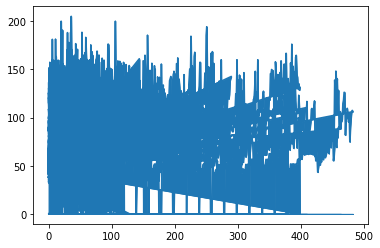

In [161]:
ax = df.plot.area()

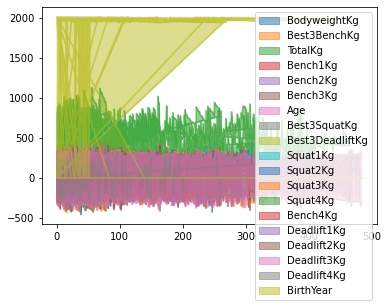

In [162]:
ax = df.plot.area(stacked=False)

In [163]:
features = [
'Sex',
'Age',
'BodyweightKg',
'Best3SquatKg',
'Best3BenchKg',
'Best3DeadliftKg',
'TotalKg'
]


In [164]:
pd.get_dummies(df)

,BodyweightKg,Best3BenchKg,TotalKg,Bench1Kg,Bench2Kg,Bench3Kg,Age,Best3SquatKg,Best3DeadliftKg,Squat1Kg,...,ChineseName_苏丹,ChineseName_蔡宗倍,ChineseName_袁世锟,ChineseName_袁增辉,ChineseName_谭添乐,ChineseName_郑海涛,ChineseName_陆锦汉,ChineseName_陈仕英,ChineseName_陈韬予,ChineseName_韩扬扬
0,52.98,88.45,88.45,NaN,NaN,NaN,34.404664,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,53.34,92.99,92.99,NaN,NaN,NaN,34.404664,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,53.61,95.25,95.25,NaN,NaN,NaN,34.404664,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,53.34,88.45,88.45,NaN,NaN,NaN,34.404664,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
4,53.34,95.25,95.25,NaN,NaN,NaN,34.404664,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12,101.50,162.50,747.50,145.0,155.0,162.5,25.000000,280.0,305.0,262.5,...,0,0,0,0,0,0,0,0,0,0
13,104.00,155.00,660.00,147.5,155.0,-160.0,23.000000,247.5,257.5,225.0,...,0,0,0,0,0,0,0,0,0,0
14,119.20,185.00,760.00,180.0,185.0,-187.5,30.000000,295.0,280.0,280.0,...,0,0,0,0,0,0,0,0,0,0
15,144.35,170.00,742.50,170.0,-190.0,-190.0,22.000000,290.0,282.5,270.0,...,0,0,0,0,0,0,0,0,0,0


In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21226 entries, 0 to 16
Data columns (total 33 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   WeightClassKg    20992 non-null  object 
 1   Division         21226 non-null  object 
 2   Name             21226 non-null  object 
 3   Team             8884 non-null   object 
 4   BodyweightKg     20996 non-null  float64
 5   Best3BenchKg     17792 non-null  float64
 6   TotalKg          19829 non-null  float64
 7   Place            21226 non-null  object 
 8   Event            21226 non-null  object 
 9   Equipment        21226 non-null  object 
 10  Sex              21226 non-null  object 
 11  Bench1Kg         10906 non-null  float64
 12  Bench2Kg         10770 non-null  float64
 13  Bench3Kg         10374 non-null  float64
 14  Age              21226 non-null  float64
 15  Best3SquatKg     12486 non-null  float64
 16  Best3DeadliftKg  14419 non-null  float64
 17  Squat1Kg       

In [170]:
df.drop(columns=['Sex'])

,WeightClassKg,Division,Name,Team,BodyweightKg,Best3BenchKg,TotalKg,Place,Event,Equipment,...,Deadlift2Kg,Deadlift3Kg,Deadlift4Kg,Country,Tested,BirthDate,State,BirthYear,CyrillicName,ChineseName
0,53.98,Class 1A,Jadan Lombard,Arnold,52.98,88.45,88.45,1,B,Raw,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,53.98,Class 1A,Dylan Phillips,Jay,53.34,92.99,92.99,2,B,Raw,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,53.98,Class 1A,Ontarriyus Reid,Palatka,53.61,95.25,95.25,3,B,Raw,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,53.98,Class 1A,Skylar Fritz,Suwannee,53.34,88.45,88.45,4,B,Raw,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,53.98,Class 1A,Lomero Black,Rutherford,53.34,95.25,95.25,5,B,Raw,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12,105,Open,Ingvi Örn Friðriksson,NaN,101.50,162.50,747.50,2,SBD,Raw,...,295.0,305.0,NaN,NaN,NaN,NaN,NaN,1994.0,NaN,NaN
13,105,Open,Halldór Jens Vilhjálmsson,NaN,104.00,155.00,660.00,3,SBD,Raw,...,222.5,257.5,NaN,NaN,NaN,NaN,NaN,1996.0,NaN,NaN
14,120,Open,Aron Friðrik Georgsson,NaN,119.20,185.00,760.00,1,SBD,Raw,...,270.0,280.0,NaN,NaN,NaN,NaN,NaN,1989.0,NaN,NaN
15,120+,Open,Guðfinnur Snær Magnússon,NaN,144.35,170.00,742.50,1,SBD,Raw,...,282.5,-290.0,NaN,NaN,NaN,NaN,NaN,1997.0,NaN,NaN


In [171]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
Sum_of_squared_distances = []
K = range(2, 15)
for k in K:
    km = KMeans(n_clusters=k, n_init=20)
    km = km.fit(df)
    Sum_of_squared_distances.append(km.inertia_)
    silh_score = silhouette_score(df, km.labels_)
print("k = {} | silhouette_score = {}".format(k, silh_score))


ValueError: could not convert string to float: '107.96+'